In [17]:
import pandas as pd
from plotnine import ggplot, aes, geom_histogram

In [7]:
data = pd.read_pickle("/home/kinari/genomics_database_access_course_kinari/data/output/paired_exons.pkl")

In [8]:
print(data.columns)

Index(['human_gene_id', 'mouse_gene_id', 'human_exon_id', 'mouse_exon_id',
       'homology_percent', 'mouse_homology_type'],
      dtype='object')


In [9]:
print(data.head())

     human_gene_id       mouse_gene_id    human_exon_id       mouse_exon_id  \
0  ENSG00000198888  ENSMUSG00000064341  ENSE00001435714  ENSMUSE00000521519   
1  ENSG00000198763  ENSMUSG00000064345  ENSE00001435686  ENSMUSE00000521523   
2  ENSG00000198804  ENSMUSG00000064351  ENSE00001435647  ENSMUSE00000521529   
3  ENSG00000198712  ENSMUSG00000064354  ENSE00001435613  ENSMUSE00000521532   
4  ENSG00000228253  ENSMUSG00000064356  ENSE00001435286  ENSMUSE00000521534   

   homology_percent mouse_homology_type  
0             76.15    ortholog_one2one  
1             73.80    ortholog_one2one  
2             80.29    ortholog_one2one  
3             75.58    ortholog_one2one  
4             75.98    ortholog_one2one  


In [10]:
print(data.shape)

(485261, 6)


In [14]:
unique_genes = data['human_gene_id'].unique()
print(f"Number of unique genes: {len(unique_genes)}")

Number of unique genes: 18505


In [15]:
# 各 human_gene_id に関連付けられた行数を計算
gene_counts = data.groupby('human_gene_id')['human_gene_id'].transform('count')

# 行数が1の遺伝子を削除
data = data[gene_counts > 1]

# 結果を確認
print(f"Number of unique genes after filtering: {data['human_gene_id'].nunique()}")

Number of unique genes after filtering: 16880


In [16]:
print(data.head())
print(data.shape)

      human_gene_id       mouse_gene_id    human_exon_id       mouse_exon_id  \
13  ENSG00000277196  ENSMUSG00000003526  ENSE00003746084  ENSMUSE00001289929   
14  ENSG00000277196  ENSMUSG00000003526  ENSE00003719550  ENSMUSE00001289929   
15  ENSG00000277196  ENSMUSG00000003526  ENSE00003723757  ENSMUSE00001289929   
16  ENSG00000277196  ENSMUSG00000003526  ENSE00003731891  ENSMUSE00000391738   
17  ENSG00000277196  ENSMUSG00000003526  ENSE00003724613  ENSMUSE00001289929   

    homology_percent mouse_homology_type  
13             100.0   ortholog_one2many  
14             100.0   ortholog_one2many  
15             100.0   ortholog_one2many  
16             100.0   ortholog_one2many  
17             100.0   ortholog_one2many  
(483468, 6)


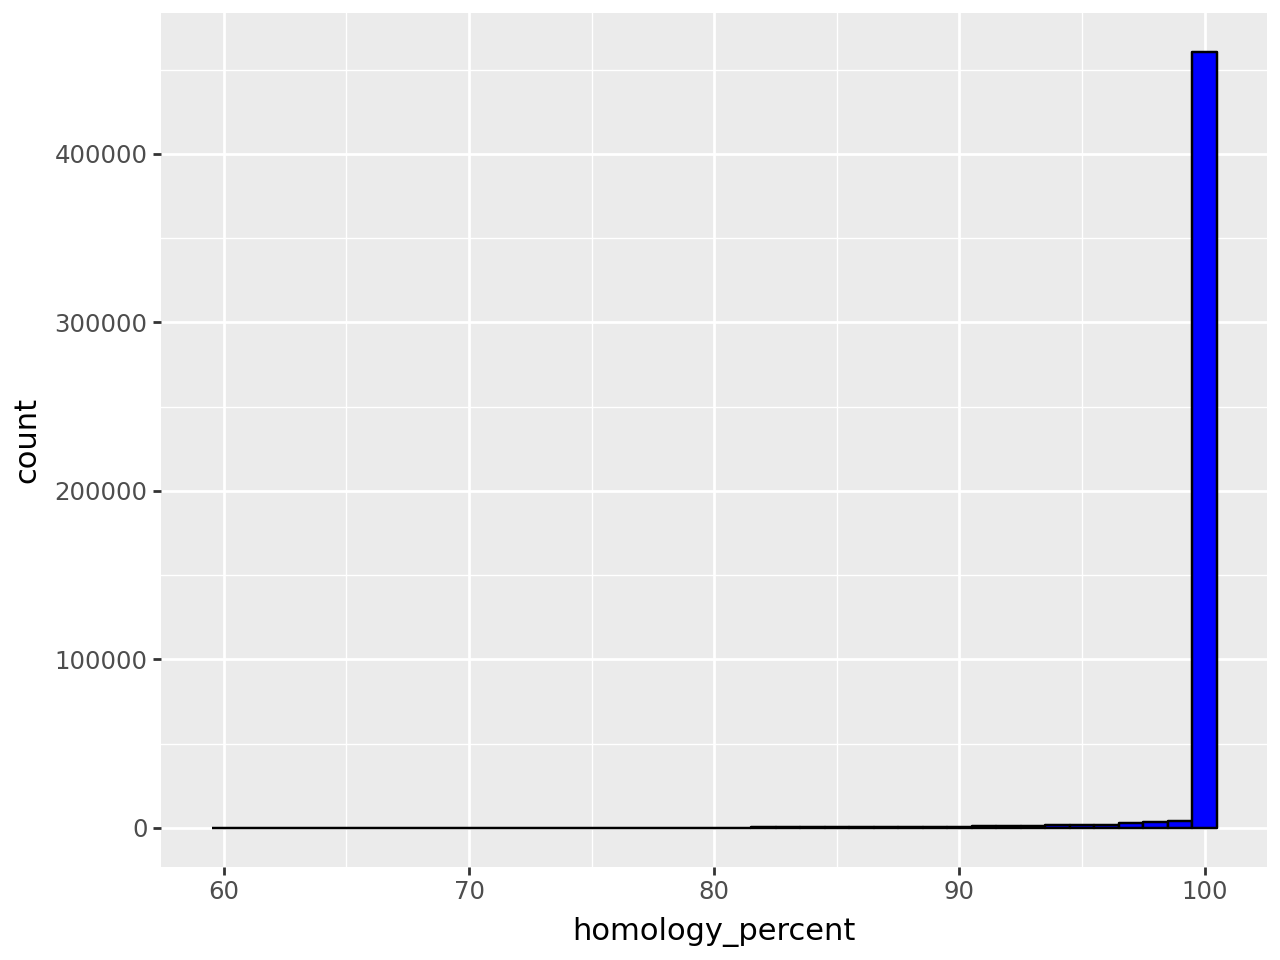

In [21]:
plot = (
    ggplot(data, aes(x="homology_percent")) +  
    geom_histogram(binwidth=1, fill="blue", color="black")  # ビン幅を指定
)

display(plot)